# Project 2: Prediction Data

## 1 Dataset Information and Description
- The California Housing dataset contains features of houses and the corresponding housing price. The features include median income of the block, median house age in block group, average number of rooms per household, average number of bedrooms per household, block group population, average number of household members, block group latitude, and block group longitude. The target variable is the median house value for California districts, expressed in hundreds of thousands of dollars ($100,000).
- The data source is [Scikit-learn: California Housing dataset](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset).
- I'm interested in this dataset because I want to know what features can be used to predict the housing price and how they correlate with it.
- My assumption is that the median income and house age might be good predictors of housing price. People with higher income can afford more expensive houses. A house that existed for a long time may be older and therefore the price may be lower.

## 2 Data Loading

In [2]:
import prediction_data

In [3]:
housing_price_data = prediction_data.PredictionData("California house prices.csv")  # create an instance of PredictionData class
print(housing_price_data.features.keys())  # print the feature abbreviations

dict_keys(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'])


Now we initiated an instance of PredictionData class named "housing_price_data". There are two attributes of this object: target and features. Target is a list of housing prices and features is a dictionary where each key is a feature abbreviation and the corresponding value is a list of feature value. We can use the feature abbreviations printed above as keys to access their values.

## 3 Scatter Plot

We plot each feature with the target in scatter plots. This allows us to roughly judge whether the feature and the target are linearly related.

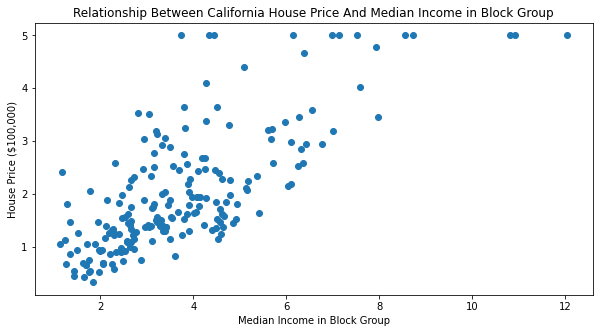

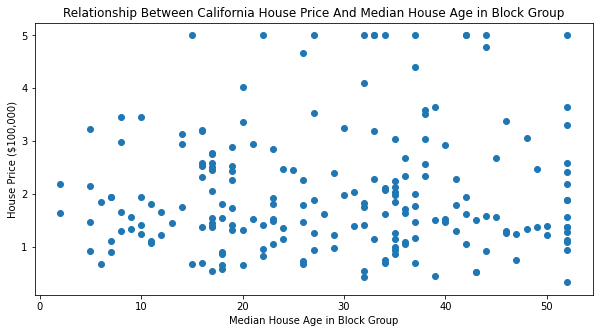

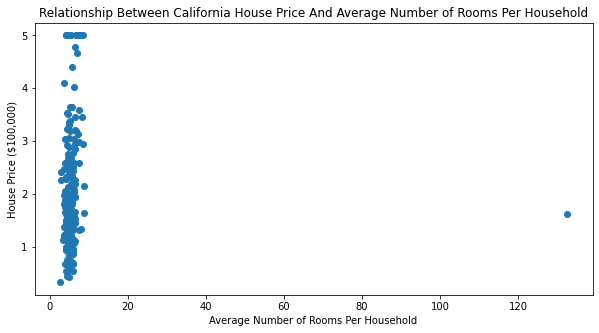

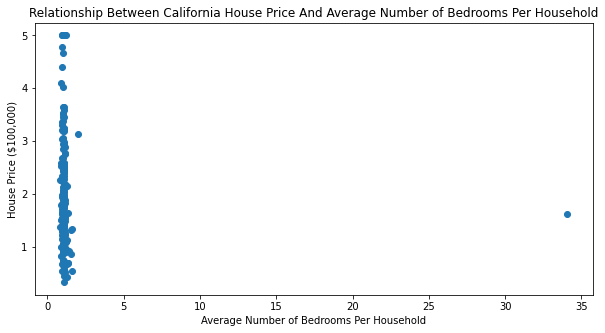

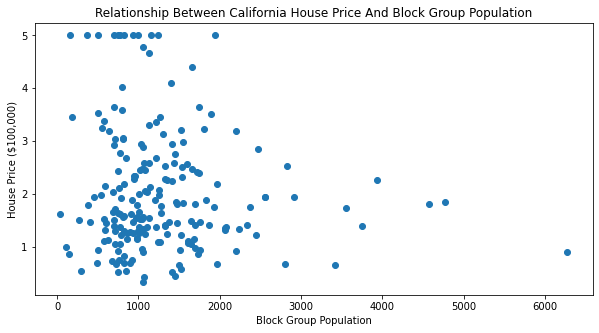

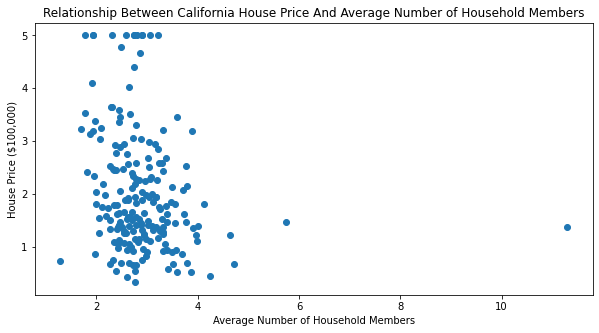

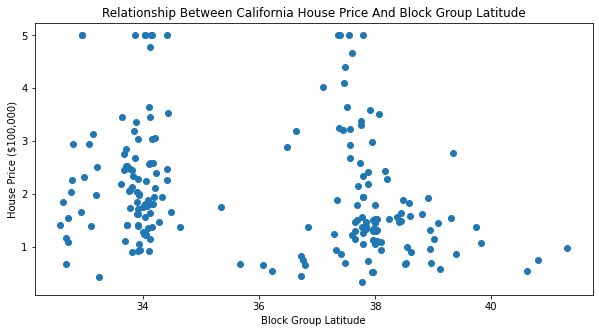

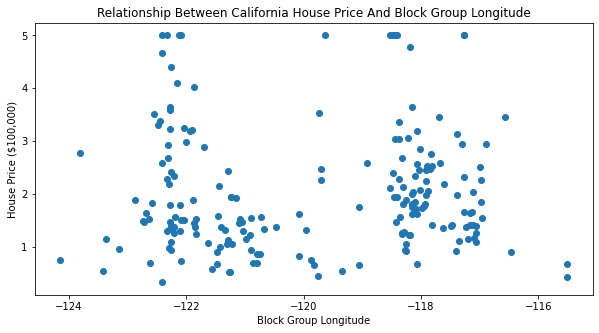

In [4]:
for feature_abbrev in housing_price_data.features.keys():
    housing_price_data.scatter_plot(feature_abbrev) # Scatter plot of each feature and target

The median income features shows stronger linear relation with target than other features. Higher median income predicts higher housing price. Due to the extreme values in some features, we can't see the linear pattern clearly.

## 4 Data Standardization

Here are the means and standard deviations of the original data:

In [5]:
housing_price_data.show_means_and_stds()  # print means and stds

MedInc
Mean: 3.7547465
Standard Deviation: 1.8150011628061704
HouseAge
Mean: 28.875
Standard Deviation: 13.60622559713016
AveRooms
Mean: 5.973584998357503
Standard Deviation: 9.042741226372208
AveBedrms
Mean: 1.2342350156908397
Standard Deviation: 2.3310086836742037
Population
Mean: 1275.645
Standard Deviation: 810.6472284384866
AveOccup
Mean: 2.8846613580389633
Standard Deviation: 0.8431988161129477
Latitude
Mean: 35.94
Standard Deviation: 2.214781930574656
Longitude
Mean: -119.84945000000002
Standard Deviation: 2.1009886238387874
Target
Mean: 2.0271405999999996
Standard Deviation: 1.1507893629320876


Now we perform data standardization:

In [6]:
housing_price_data.standardize()  # standardize the data

Here are the means and standard deviations of the standardized data:

In [7]:
housing_price_data.show_means_and_stds()  # print means and stds after standardization

MedInc
Mean: -4.440892098500626e-18
Standard Deviation: 0.9999999999999998
HouseAge
Mean: -8.881784197001253e-18
Standard Deviation: 1.0
AveRooms
Mean: 1.7763568394002505e-17
Standard Deviation: 1.0
AveBedrms
Mean: -7.105427357601002e-17
Standard Deviation: 1.0000000000000002
Population
Mean: 1.9984014443252817e-17
Standard Deviation: 1.0
AveOccup
Mean: 4.707345624410664e-16
Standard Deviation: 0.9999999999999999
Latitude
Mean: 9.592326932761353e-16
Standard Deviation: 1.0
Longitude
Mean: 8.739675649849232e-15
Standard Deviation: 0.9999999999999999
Target
Mean: 2.842170943040401e-16
Standard Deviation: 0.9999999999999999


After the standardization, the mean of each column becomes zero and the standard deviation of each column becomes one.

## 5 Data Modeling

Now we need to find the best linear regression model for the standardized data. The best model is the model that minimizes R value, where ties are all treated as the best models.

In [8]:
best_features, best_betas, lowest_r_square, models = housing_price_data.find_best_linear_regression_model()  # find the best linear regression model

In [9]:
print("Best feature(s): {}".format(best_features))  # print the best features
print("Lowest R square: {}".format(lowest_r_square[0]))  # print the lowest R-square

Best feature(s): ['MedInc']
Lowest R square: 89.81754797103159


Therefore, the best model has R-square of 89.82 and the corresponding feature of the best model is the median income.

To verify the above result, we can take a look at the model information of each feature:

In [12]:
prediction_data.PredictionData.show_model_info(models)  # print info of each feature's model

MedInc
slope: 0.7422346395479273
y-intercept: 2.51214793389404e-16
R-square: 89.81754797103159
HouseAge
slope: 0.06226351199707239
y-intercept: 2.51214793389404e-16
R-square: 199.22465101475805
AveRooms
slope: 0.02030728065269607
y-intercept: 2.51214793389404e-16
R-square: 199.91752287049854
AveBedrms
slope: -0.03355393834811009
y-intercept: 2.51214793389404e-16
R-square: 199.77482664426626
Population
slope: -0.1080975560181026
y-intercept: 2.51214793389404e-16
R-square: 197.66298367658274
AveOccup
slope: -0.20890092036908697
y-intercept: 2.51214793389404e-16
R-square: 191.2720810937898
Latitude
slope: -0.21631390882364476
y-intercept: 2.51214793389404e-16
R-square: 190.64165856988706
Longitude
slope: 0.03962647739210776
y-intercept: -9.813077866773594e-17
R-square: 199.6859484578984


Given the above information, we see that other feature's model has R-square of around 199 while the median income's model has R-square of 89.82, which is indeed the lowest R-square and thus the best model.

## 6 Extreme Values Removal

From the scatter plots, I noticed that some features(average rooms, average bedroom, population, average household members) have an extremely large value. These extremely large values might affect the mean value and the linear regression model. Here I want to delete the maximum values of these features and see how the outcome model will change from the original one.

In [13]:
housing_price_data_extra_credit = prediction_data.PredictionData("California house prices.csv")  # create a instance of PredictionData class used for extra credit

We create a new instance of the PredictionData class used for this extra credit question, where the data has not been standardized.

In [14]:
new_models = housing_price_data_extra_credit.linear_regression_excluding_max(["AveRooms",
                                                                              "AveBedrms",
                                                                              "Population",
                                                                              "AveOccup"])  # perform linear regression to the features excluding maximum value
prediction_data.PredictionData.show_model_info(new_models)  # print the info of models

AveRooms
slope: 0.35859380925471857
y-intercept: 2.7545568243349817e-16
R-square: 173.41068551287395
AveBedrms
slope: -0.1592722548218186
y-intercept: 2.7545568243349817e-16
R-square: 193.9518374199509
Population
slope: -0.08692049715604852
y-intercept: 1.2592259768388487e-16
R-square: 197.49652060765496
AveOccup
slope: -0.2554747563240446
y-intercept: 2.4397503301252695e-16
R-square: 186.01179712735276


After deleting the maximum value of each feature in "AveRooms", "AveBedrms", "Population", "AveOccup" and the corresponding housing price, we performed standardization and then linear regression. We notice that all these four feature's models' R-squares become smaller than the original models. Therefore, deleting the extremely large value in these features can give us better linear regression models.